In [1]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras import models
from tensorflow.keras import layers

#custom
import tensorflow as tf

#from new tutorial
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

import random
import cv2
import tifffile as tiff

from PIL import Image

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
datapath = "/mnt/hgfs/VMsharedFolder/git/misc"
x_path = "/processed/val/images/"
y_path = "/processed/val/masks/"
#x_train1 = cv2.imread(datapath+'/RGB-PanSharpen_AOI_2_Vegas_img991.tif' ,1)
x_train0 = tiff.imread(datapath+'/RGB-PanSharpen_AOI_2_Vegas_img991.tif')
x_train = x_train0[:512 ,:512 ,:]
x_train = (x_train > 0).astype(np.int32)
x_train1 = tf.convert_to_tensor(x_train ,np.float32)
x_train2 = tf.expand_dims(x_train1, axis=-1)
y_train0 = np.load(datapath+y_path+'/991_mask.npy')
y_train1 = y_train0[:512 ,:512]
y_train = (y_train1 > 0).astype(np.int32)

print("x_train:")
print(x_train.dtype)
print(x_train.shape)
print(type(x_train))
print("\nx_train1:")
print(x_train1.dtype)
print(x_train1.shape)
print(type(x_train1))
print("\nx_train2:")
print(x_train2.dtype)
print(x_train2.shape)
print(type(x_train2))
print("\ny_train:")
print(y_train.dtype)
print(y_train.shape)
print(type(y_train))
print("\ny_train1:")
print(y_train1.dtype)
print(y_train1.shape)
print(type(y_train1))

img_size = x_train.shape
print(img_size)

x_train:
int32
(512, 512, 3)
<class 'numpy.ndarray'>

x_train1:
<dtype: 'float32'>
(512, 512, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>

x_train2:
<dtype: 'float32'>
(512, 512, 3, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>

y_train:
int32
(512, 512)
<class 'numpy.ndarray'>

y_train1:
uint8
(512, 512)
<class 'numpy.ndarray'>
(512, 512, 3)


In [3]:
x_train10 = x_train[:256 ,:256 ,:]
y_train10 = y_train[:256 ,:256]
img_size10 = x_train10.shape
num_classes = 2
print(x_train10.shape)
print(y_train10.shape)

(256, 256, 3)
(256, 256)


In [4]:
epochs = 15

In [5]:
num_classes = 2
batch_size = 2

input_imgs_path = datapath + x_path
target_imgs_path = datapath + y_path

x=[]
y=[]

input_img_paths = sorted(
    [
        os.path.join(input_imgs_path ,fname)
        for fname in os.listdir(input_imgs_path)
       # if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_imgs_path, fname)
        for fname in os.listdir(target_imgs_path)
       # if fname.endswith(".png") and not fname.startswith(".")
        
    ]
)

for npy in input_img_paths:
    x.append(np.load(npy))

for npy in target_img_paths:
    y.append(np.load(npy))
    
x = np.array(x)
x = x [: ,:512 ,:512 ,:]
y = np.array(y)
y = y[: ,:512 ,:512]
print(x.shape)
print(y.shape)

(5, 512, 512, 3)
(5, 512, 512)


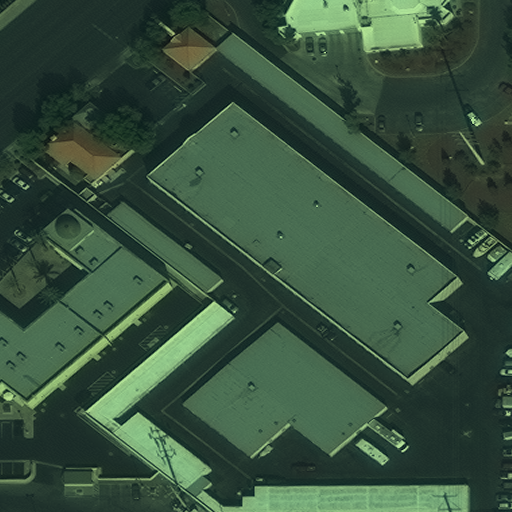

In [6]:
Image.fromarray(x[4] ,'RGB')

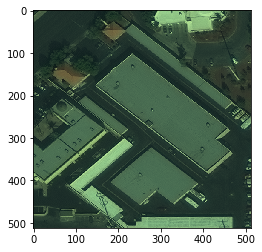

In [7]:
plt.imshow(x[4])

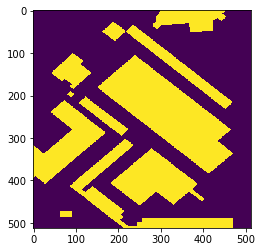

In [8]:
plt.imshow(y[4])

num_classes = 2
batch_size = 2

input_img_paths = datapath + x_path
target_dir = datapath + y_path

input_img_paths = sorted(
    [
        os.path.join(input_img_paths ,fname)
        for fname in os.listdir(input_img_paths)
       # if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
       # if fname.endswith(".png") and not fname.startswith(".")
        
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)
    x_train = tiff.imread(datapath+'/RGB-PanSharpen_AOI_2_Vegas_img991.tif')

from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[2]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[2]))
display(img)

from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y

In [61]:
def get_model(img_size = (512,512,3) ,num_classes=2 ,filter_sizes=[64, 128, 256]):
    #inputs = keras.Input(shape=img_size + (3,))
    inputs = Input(shape=img_size)

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in filter_sizes:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###
    filter_sizes.reverse()
    filter_sizes.append(32)
    
    for filters in filter_sizes:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    if num_classes==1:
        outputs = layers.Conv2D(filters=num_classes, kernel_size=3, activation="sigmoid", padding="same")(x)
    else:
        outputs = layers.Conv2D(filters=num_classes, kernel_size=3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
#model = get_model((650,650,3), num_classes)
unet = get_model(img_size = img_size ,num_classes=1)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Split our img paths into a training and a validation set
val_samples = 2
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [43]:
train_size = 2
x_train = x[train_size:]
x_val = x[:train_size]
y_train = y[train_size:] 
y_val = y[:train_size]
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(3, 512, 512, 3)
(2, 512, 512, 3)
(3, 512, 512)
(2, 512, 512)


# fit_generator is depreciated. might not need flow_from directory, since we're outputting npy arrays

/mnt/hgfs/VMsharedFolder/git/misc/processed/val/images/"
/mnt/hgfs/VMsharedFolder/git/misc/processed/val/masks/"

input_img_paths

batch_sz = 2
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
       # horizontal_flip=True
        )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        input_imgs_path,
        target_size=img_size,
        batch_size=2,
        #class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
        target_imgs_path,
        target_size=img_size,
        batch_size=1,
        class_mode='binary'
)

def array_generator(np_array):
    for


model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=test_generator,
        validation_steps=800)

# end of fit_generator alternative code

In [80]:
# initialize the number of epochs and batch size
EPOCHS = 5
BS = 2

#unet.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
unet.compile(optimizer="rmsprop"
             ,loss="binary_crossentropy"
             ,metrics=['acc'])
#saves model every 2 epochs (periods)
weight_path = "/mnt/hgfs/VMsharedFolder/git/misc/"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=weight_path+'model_checkpoint_unet1_e{epoch:02d}.h5'
                                                    ,save_freq=2
                                                    ,verbose=1
                                                    ,save_weights_only=False
                                                    ,monitor = ()'val_acc','val_loss')
                                                    ,save_best_only=True)

SyntaxError: invalid syntax (<ipython-input-80-1c7c4fe7502e>, line 15)

In [79]:
H = unet.fit(x_train, y_train
              #,batch_size=2
              ,validation_data=(x_val, y_val)
              ,steps_per_epoch=len(x_train) // BS
              ,callbacks=[model_checkpoint]
              ,epochs=EPOCHS)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1022 - acc: 0.9603 - val_loss: 13.0885 - val_acc: 0.0612
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 0.0928 - acc: 0.9643 - val_loss: 12.1498 - val_acc: 0.0612
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.0872 - acc: 0.9660 - val_loss: 11.6781 - val_acc: 0.0612
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.0832 - acc: 0.9678 - val_loss: 10.7633 - val_acc: 0.0612
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.0796 - acc: 0.9692 - val_loss: 10.2013 - val_acc: 0.0612


# use this eventually
weight_path = "/mnt/hgfs/VMsharedFolder/git/misc/"
model_json = model.to_json()
with open("model_weights.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(weight_path+"model_weights_unet1.hf5")
print("Saved model to disk")

save_model_weights_hdf5(model, weight_path, overwrite = TRUE)

# use this eventually
from tensorflow import keras
model = keras.models.load_model('path/to/location')

In [36]:
y_train[2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

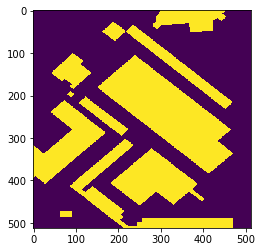

In [37]:
plt.imshow(y_train[2])

In [40]:
# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in unet.layers[:12]] 
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=unet.input, outputs=layer_outputs) 
# Returns a list of five Numpy arrays: one array per layer activation

In [42]:
print(x_train[2].shape)
temp = np.expand_dims(x_train[2] ,axis=0)
print(temp.shape)
unet.predict(temp) 

(512, 512, 3)
(1, 512, 512, 3)


array([[[[7.3928386e-10, 1.0000000e+00],
         [2.3604754e-09, 1.0000000e+00],
         [2.9256969e-10, 1.0000000e+00],
         ...,
         [7.0759421e-20, 1.0000000e+00],
         [2.2960755e-19, 1.0000000e+00],
         [2.9312182e-12, 1.0000000e+00]],

        [[1.2621082e-09, 1.0000000e+00],
         [9.9456588e-19, 1.0000000e+00],
         [5.7501337e-20, 1.0000000e+00],
         ...,
         [9.9130868e-26, 1.0000000e+00],
         [6.6384228e-25, 1.0000000e+00],
         [1.8960366e-17, 1.0000000e+00]],

        [[3.3763272e-09, 1.0000000e+00],
         [2.2625758e-18, 1.0000000e+00],
         [5.1355865e-19, 1.0000000e+00],
         ...,
         [1.0826887e-25, 1.0000000e+00],
         [1.1965228e-24, 1.0000000e+00],
         [7.6999437e-17, 1.0000000e+00]],

        ...,

        [[1.0913771e-23, 1.0000000e+00],
         [3.8183254e-25, 1.0000000e+00],
         [4.7374150e-24, 1.0000000e+00],
         ...,
         [9.0587767e-25, 1.0000000e+00],
         [2.0377934e-2

In [58]:
tempy = model.predict(temp)
print(tempy.shape)
print(tempy[:,[1,3]].shape)

(1, 512, 512, 2)
(1, 2, 512, 2)


In [ ]:
plt.imshow(tempy)

In [33]:
activation_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [18]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: name 'activations' is not defined